In [1]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [8]:
!pip install -q datascience                   
!pip install -q pandas-profiling              
!pip install -q yellowbrick    

In [13]:
!pip install -q --user pandas


In [37]:
!pip install mysql.connector

In [60]:
!pip install googletrans

In [3]:
import numpy as np
import pandas as pd

In [4]:
data= pd.read_csv('events_data.csv',thousands=',')
data
ed = data

In [2]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df=data)
#profile.to_file(output_file='Pre Profiling Report.html')
#print('Accomplished!')
###

In [5]:
import mysql.connector
from mysql.connector import errorcode
try:
 cnx1 = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')
 #cursor = cnx.cursor()
 #cursor.execute('select * from gender_age_train')
 #rows = cursor.fetchall()
 phone_brand_device = pd.read_sql_query('select * from phone_brand_device_model', con=cnx1)
 print(phone_brand_device.head())
 print(phone_brand_device.info())

except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
 cnx1.close()

             device_id phone_brand device_model
0  1877775838486905855        vivo          Y13
1 -3766087376657242966          小米         V183
2 -6238937574958215831        OPPO          R7s
3  8973197758510677470          三星        A368t
4 -2015528097870762664          小米      红米Note2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None


In [6]:
try:
 cnx = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')
 #cursor = cnx.cursor()
 #cursor.execute('select * from gender_age_train')
 #rows = cursor.fetchall()
 gender_age = pd.read_sql_query('select * from gender_age_train', con=cnx)
 print(gender_age.head())
 print(gender_age.info())

except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
 cnx.close()

             device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
None


In [8]:
ed

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh


In [87]:
ed['timestamp']=pd.to_datetime(ed['timestamp'],format= '%Y-%m-%d %H:%M:%S')

In [88]:
ed['timestamp']

0         2016-05-07 22:52:05
1         2016-05-01 20:44:16
2         2016-05-02 14:23:04
3         2016-05-03 13:21:16
4         2016-05-06 03:51:05
                  ...        
3252945   2016-05-07 23:33:14
3252946   2016-05-03 05:13:30
3252947   2016-05-01 16:03:28
3252948   2016-05-05 17:22:36
3252949   2016-05-07 17:34:18
Name: timestamp, Length: 3252950, dtype: datetime64[ns]

In [90]:
ed.loc[0,'timestamp'].day_name()

'Saturday'

In [12]:
ed.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [13]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [27]:
ed.isna().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [33]:
ed[ed['state'].isna()]

,event_id,device_id,timestamp,longitude,latitude,city,state
2931,706554,-5.829328e+18,2016-05-05 16:58:46,73.851671,18.593313,Pune,NaN
16243,1918653,3.137054e+18,2016-05-03 00:46:10,83.326714,17.829748,Visakhapatnam,NaN
26956,1068940,-1.752057e+18,2016-05-04 16:09:17,75.930969,22.818845,Indore,NaN
30889,2164200,-3.945827e+17,2016-05-04 19:33:09,83.366564,17.757190,Visakhapatnam,NaN
32685,460124,5.536513e+18,2016-05-01 21:30:10,80.359796,13.128174,Chennai,NaN
...,...,...,...,...,...,...,...
3210326,1070365,-5.858653e+18,2016-05-07 17:03:06,88.619418,25.484459,Gangarampur,NaN
3226848,145171,4.620271e+18,2016-05-07 20:38:45,87.812710,22.957980,Arambagh,NaN
3235317,210361,-8.340098e+18,2016-05-05 20:53:20,77.305988,28.688980,Delhi,NaN
3236931,2738361,4.113023e+18,2016-05-02 18:15:04,75.906533,22.732515,Indore,NaN


In [63]:
ed['state'].nunique()

32

In [65]:
ed['city'].nunique()

933

In [59]:
ed['state'].value_counts()

Delhi                       751733
Maharashtra                 677105
TamilNadu                   436282
AndhraPradesh               321332
MadhyaPradesh               232690
Rajasthan                   196361
WestBengal                  196161
Karnataka                    99058
UttarPradesh                 94750
Gujarat                      42881
Bihar                        35472
Punjab                       26195
Kerala                       23148
Haryana                      21053
Jharkhand                    18060
Orissa                       15904
Telangana                    12784
Assam                        12021
Chhattisgarh                  9754
Uttaranchal                   7720
JammuandKashmir               5385
Goa                           3250
Nagaland                      2298
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
HimachalPradesh               1409
Manipur             

In [64]:
ed['city'].value_counts()

Delhi               744276
Chennai             366875
Pune                317276
Mumbai              285246
Visakhapatnam       235772
                     ...  
Ramachandrapuram       279
Sirhind                269
Tadepallegudem         264
Brajrajnagar           263
Kovilpatti             258
Name: city, Length: 933, dtype: int64

In [10]:
ga = gender_age
ga

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


In [14]:
ga.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [28]:
ga.isna().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [15]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


array([[<AxesSubplot:title={'center':'device_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

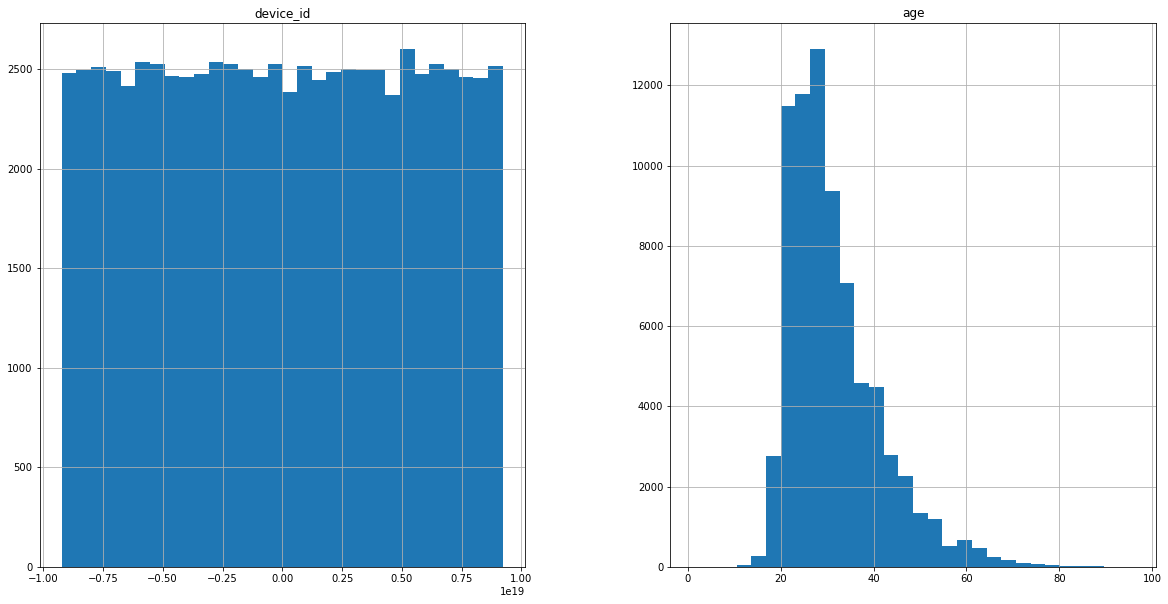

In [44]:
import matplotlib as plt
%matplotlib inline
ga.hist(bins = 30, figsize = (20,10))

In [51]:
ga[ga['age']<18]

,device_id,gender,age,group
708,5203430653181720743,M,17,M22-
714,-22473684698194950,M,17,M22-
808,4044377088870916300,F,16,F23-
969,-4524657025127131391,M,17,M22-
1451,-3636452871368886737,M,17,M22-
...,...,...,...,...
73362,-8801877210168984210,M,16,M22-
74007,1803849488843663190,F,17,F23-
74028,8797171753643586556,M,17,M22-
74075,-6928066432062548595,M,15,M22-


In [55]:
ga[ga['age']>62]

,device_id,gender,age,group
18,-6876541075223249434,M,75,M39+
84,5660846220747791709,F,64,F43+
248,-4153865198013987891,M,70,M39+
259,1540134249071138179,F,67,F43+
386,-4005849076109412284,M,63,M39+
...,...,...,...,...
73751,4505714599473564924,M,65,M39+
73868,902726754924112715,M,76,M39+
74164,-5756223325341616639,M,80,M39+
74295,1789551105339717133,F,70,F43+


In [11]:
pbd = phone_brand_device
pbd

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2
...,...,...,...
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2


In [16]:
pbd.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [17]:
pbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [29]:
pbd.isna().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [18]:
merged1 = pd.merge(left=pbd, right=ed, on='device_id')
merged1

,device_id,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
0,-6552729385743211,vivo,X3T,3078973,2016-05-07 21:41:38,78.487472,17.338947,Rajendranagar,AndhraPradesh
1,-6552729385743211,vivo,X3T,695286,2016-05-07 22:40:59,78.487472,17.338947,Rajendranagar,AndhraPradesh
2,-6552729385743211,vivo,X3T,2866467,2016-05-07 22:42:31,78.487472,17.338947,Rajendranagar,AndhraPradesh
3,-6552729385743211,vivo,X3T,2816043,2016-05-04 22:31:13,78.487472,17.338947,Rajendranagar,AndhraPradesh
4,-6552729385743211,vivo,X3T,2135433,2016-05-04 22:13:20,78.487472,17.338947,Rajendranagar,AndhraPradesh
...,...,...,...,...,...,...,...,...,...
16977,35661017933917548,酷派,F2,2679034,2016-05-04 20:50:53,88.437580,22.632748,Calcutta,WestBengal
16978,35661017933917548,酷派,F2,280992,2016-05-04 14:33:47,88.437580,22.632748,Calcutta,WestBengal
16979,35661017933917548,酷派,F2,739645,2016-05-03 18:29:05,88.437580,22.632748,Calcutta,WestBengal
16980,35661017933917548,酷派,F2,862412,2016-05-05 08:39:14,88.437580,22.632748,Calcutta,WestBengal


In [19]:
merged2 = pd.merge(left=merged1, right=ga, on='device_id')
merged2

,device_id,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state,gender,age,group
0,-6552729385743211,vivo,X3T,3078973,2016-05-07 21:41:38,78.487472,17.338947,Rajendranagar,AndhraPradesh,M,28,M27-28
1,-6552729385743211,vivo,X3T,695286,2016-05-07 22:40:59,78.487472,17.338947,Rajendranagar,AndhraPradesh,M,28,M27-28
2,-6552729385743211,vivo,X3T,2866467,2016-05-07 22:42:31,78.487472,17.338947,Rajendranagar,AndhraPradesh,M,28,M27-28
3,-6552729385743211,vivo,X3T,2816043,2016-05-04 22:31:13,78.487472,17.338947,Rajendranagar,AndhraPradesh,M,28,M27-28
4,-6552729385743211,vivo,X3T,2135433,2016-05-04 22:13:20,78.487472,17.338947,Rajendranagar,AndhraPradesh,M,28,M27-28
...,...,...,...,...,...,...,...,...,...,...,...,...
16977,35661017933917548,酷派,F2,2679034,2016-05-04 20:50:53,88.437580,22.632748,Calcutta,WestBengal,F,32,F29-32
16978,35661017933917548,酷派,F2,280992,2016-05-04 14:33:47,88.437580,22.632748,Calcutta,WestBengal,F,32,F29-32
16979,35661017933917548,酷派,F2,739645,2016-05-03 18:29:05,88.437580,22.632748,Calcutta,WestBengal,F,32,F29-32
16980,35661017933917548,酷派,F2,862412,2016-05-05 08:39:14,88.437580,22.632748,Calcutta,WestBengal,F,32,F29-32


In [20]:
merged2.describe()

,device_id,event_id,longitude,latitude,age
count,1.698200e+04,1.698200e+04,16982.000000,16982.000000,16982.000000
mean,1.747888e+17,1.629002e+06,77.586701,21.232838,32.433518
std,2.196515e+18,9.368065e+05,4.364865,5.495319,9.155786
min,-9.086138e+18,2.880000e+02,69.677548,8.883912,10.000000
25%,-4.973076e+16,8.204910e+05,75.819181,18.506788,26.000000
50%,3.950346e+15,1.627304e+06,77.078352,22.608837,30.000000
75%,1.274328e+17,2.447712e+06,80.143569,26.567374,36.000000
max,8.765877e+18,3.252680e+06,94.190182,33.749656,79.000000


In [56]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16982 entries, 0 to 16981
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     16982 non-null  int64  
 1   phone_brand   16982 non-null  object 
 2   device_model  16982 non-null  object 
 3   event_id      16982 non-null  int64  
 4   timestamp     16982 non-null  object 
 5   longitude     16982 non-null  float64
 6   latitude      16982 non-null  float64
 7   city          16982 non-null  object 
 8   state         16982 non-null  object 
 9   gender        16982 non-null  object 
 10  age           16982 non-null  int64  
 11  group         16982 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [21]:
ed['device_id'].unique

<bound method Series.unique of 0          2.973348e+18
1          4.734221e+18
2         -3.264500e+18
3          5.731369e+18
4          3.388880e+17
               ...     
3252945   -1.937028e+18
3252946    3.345851e+18
3252947   -6.406040e+18
3252948   -2.920741e+18
3252949    3.212750e+18
Name: device_id, Length: 3252950, dtype: float64>

In [22]:
pbd['device_id'].unique

<bound method Series.unique of 0        1877775838486905855
1       -3766087376657242966
2       -6238937574958215831
3        8973197758510677470
4       -2015528097870762664
                ...         
87721   -4961458925928574032
87722   -8819817317449262375
87723   -3358291377416935026
87724    3282788959750981633
87725    2491639413207286271
Name: device_id, Length: 87726, dtype: int64>

In [23]:
ga['device_id'].unique

<bound method Series.unique of 0       -8076087639492063270
1       -2897161552818060146
2       -8260683887967679142
3       -4938849341048082022
4         245133531816851882
                ...         
74640    4682031842235089751
74641   -9178703742877135986
74642     180946546684162312
74643    1390702386071991851
74644      89181010588227347
Name: device_id, Length: 74645, dtype: int64>

In [24]:
ed['event_id'].unique

<bound method Series.unique of 0          2765368
1          2955066
2           605968
3           448114
4           665740
            ...   
3252945    2687452
3252946    1051580
3252947    1316227
3252948     381262
3252949     522592
Name: event_id, Length: 3252950, dtype: int64>

In [25]:
merged2['phone_brand'].value_counts()

三星      4704
小米      4403
华为      2116
vivo    1781
OPPO    1103
魅族       955
酷派       759
HTC      336
乐视       287
优米       194
天语        92
普耐尔       40
波导        38
一加        35
宝捷讯       29
中国移动      21
联想        20
努比亚       18
亿通        17
美图        13
酷比魔方       8
酷比         5
LG         3
米歌         3
锤子         1
朵唯         1
Name: phone_brand, dtype: int64

In [79]:
pbd['device_model'].value_counts()

红米note           3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
                 ... 
G5                  1
X7                  1
P21                 1
W2016               1
S560                1
Name: device_model, Length: 1467, dtype: int64

In [73]:
merged2['device_model'].value_counts()

红米               1246
红米note           1196
Galaxy Note 2     595
红米Note2           536
荣耀6               514
                 ... 
E5                  1
R5                  1
三星big foot          1
R831S               1
D350                1
Name: device_model, Length: 191, dtype: int64

In [74]:
merged2['group'].value_counts()

M23-26    3195
M29-31    2355
M32-38    2075
M39+      1923
M27-28    1543
F43+      1351
F33-42    1039
F29-32     978
M22-       755
F27-28     644
F23-       624
F24-26     500
Name: group, dtype: int64

In [77]:
pbd['phone_brand'].value_counts()

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
        ...  
世纪星         1
瑞高          1
大显          1
欧沃          1
丰米          1
Name: phone_brand, Length: 116, dtype: int64

In [78]:
pbd['phone_brand'].nunique()

116

In [71]:
merged2['phone_brand'].nunique()

26

In [72]:
merged2['device_model'].nunique()

191

In [76]:
merged2['group'].nunique()

12

In [26]:
Chinese_brands1 = merged2['phone_brand'].value_counts().index.tolist()
Chinese_brands1

['三星',
 '小米',
 '华为',
 'vivo',
 'OPPO',
 '魅族',
 '酷派',
 'HTC',
 '乐视',
 '优米',
 '天语',
 '普耐尔',
 '波导',
 '一加',
 '宝捷讯',
 '中国移动',
 '联想 ',
 '努比亚',
 '亿通',
 '美图',
 '酷比魔方',
 '酷比',
 'LG',
 '米歌',
 '锤子',
 '朵唯']